# Katrina Rivera, 004886996

# 1.) Pull in Data and Convert to Monthly

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [12]:
apple_data = yf.download('AAPL')
df = apple_data.resample("M").last()[["Adj Close"]]

[*********************100%%**********************]  1 of 1 completed


# 2.) Create columns. 
  - Current Stock Price, Difference in stock price, Whether it went up or down over the next month,  option premium

In [22]:
# difference in stockprice between this period and the next period 
df["Diff"] = df["Adj Close"].diff().shift(-1)


In [50]:
# target: whether it goes up or down 
df["Target"] = np.sign(df["Diff"])

In [27]:
# option premium
df["Premium"] = .08 * df["Adj Close"]

# 3.) Pull in X data and build a LogReg on column 2

In [28]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [52]:
X = pd.read_csv("Xdata.csv", index_col="Date", parse_dates=["Date"])

In [53]:
y = df.loc[:"2023-09-30","Target"].copy()

df = df.loc[: "2023-09-30",:].copy()

In [54]:
logreg = LogisticRegression()
logreg.fit(X,y)

y_pred = logreg.predict(X)

# 4.) Add columns, prediction and profits.

In [36]:
df["Predictions"] = y_pred

In [47]:
df["Profits"] = 0.

# True positive
df.loc[(df["Predictions"] == 1) & (df["Target"] == 1), "Profits"] = df.loc[(df["Predictions"] == 1) & (df["Target"] == 1), "Premium"]

# False Positives
df.loc[(df["Predictions"] == 1) & (df["Target"] == -1), "Profits"] = 100*df["Diff"] + df["Premium"]


In [48]:
df

,Adj Close,Diff,Target,Premium,Predictions,Profits
Date,,,,,,
1980-12-31,0.117887,-0.020296,-1.0,0.009431,-1.0,0.000000
1981-01-31,0.097591,-0.006045,-1.0,0.007807,-1.0,0.000000
1981-02-28,0.091546,-0.006909,-1.0,0.007324,-1.0,0.000000
1981-03-31,0.084637,0.013386,1.0,0.006771,1.0,0.006771
1981-04-30,0.098023,0.016409,1.0,0.007842,1.0,0.007842
...,...,...,...,...,...,...
2023-05-31,176.778061,16.675507,1.0,14.142245,1.0,14.142245
2023-06-30,193.453568,2.473389,1.0,15.476285,1.0,15.476285
2023-07-31,195.926956,-8.304138,-1.0,15.674156,-1.0,0.000000


# 5.) Plot profits over time

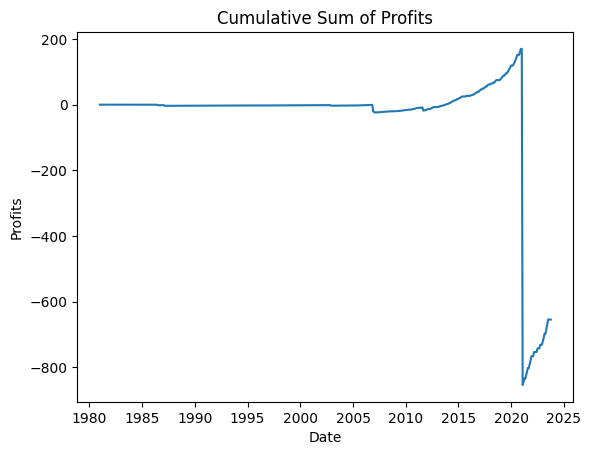

In [55]:
from numpy import cumsum
plt.plot(cumsum(df["Profits"]))
plt.title("Cumulative Sum of Profits")
plt.xlabel("Date")
plt.ylabel("Profits")
plt.show()

# 5.5

I learned from these presentations about how to apply my skills to niche markets. For StarsAreana, I learned that machine modeling can analyze the data of purchased tickets and trading of ethereum. I see my skills valuable to PJ by using machine modeling techniques on data such as consumer behavior, trading prices, and ticket sales. For example, I can identify patterns in consumer behavior, such as peak trading times, enabling more targeted and dynamic pricing models. By understanding how the demand for trading fucturates, such as an increase for trading at certain times of the day, then prices of ethereum can be increased to match that demand. We can do this through models that predict the price and volume of ethereum and models that can forecast the volume of trades being made. Additionally, by forecasting trading volume, StarsArea can ensure that it has the backend infastructure to handle to increase and decrease in trading volume.

# 6.) Create a loop that stores total profits over time

# 7.) What is the optimal threshold and plot the total profits for this model.